# ODEs
```{index} ODEs
```

In [1]:
# This cell just imports the relevant modules

import numpy as np
from math import pi, exp
from sympy import init_printing, sin, cos, Function, Symbol, diff, integrate, dsolve, checkodesol, solve, ode_order, classify_ode, pprint
import mpmath
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

## Order of an ODE

**Slide 9**

Use `sympy` to define dependent and independent variables, constants, ODE, and to find the order of ODEs.

In [2]:
t = Symbol('t')  # Independent variable
eta = Symbol('eta')  # Constant
v = Function('v')(t)  # Dependent variable v(t)
ode = diff(v,t) + eta*v # The ODE we wish to solve. Make sure the RHS is equal to zero.
print("ODE #1:") 
pprint(ode)
print("The order of ODE #1 is", ode_order(ode, v)) 

x = Function('x')(t)  # Dependent variable x(t)
m = Symbol('m')  # Constant
k = Symbol('k')  # Constant
ode = m*diff(x,t,2) + k*x
print("ODE #2:") 
pprint(ode)
print("The order of ODE #2 is", ode_order(ode, x)) 

y = Function('y')(t)  # Dependent variable y(t)
ode = diff(y,t,4) - diff(y,t,2)
print("ODE #3:") 
pprint(ode)
print("The order of ODE #3 is", ode_order(ode, y))

ODE #1:
         d       
η⋅v(t) + ──(v(t))
         dt      
The order of ODE #1 is 1
ODE #2:
             2      
            d       
k⋅x(t) + m⋅───(x(t))
             2      
           dt       
The order of ODE #2 is 2
ODE #3:
    2           4      
   d           d       
- ───(y(t)) + ───(y(t))
    2           4      
  dt          dt       
The order of ODE #3 is 4


# Analytical solutions

**Slide 14**

Solving ODEs analytically using `sympy.dsolve`

In [3]:
x = Symbol('x')  # Independent variable
y = Function('y')(x)  # Dependent variable y(x)

# The ODE we wish to solve. Make sure the RHS is equal to zero.
ode = diff(y,x) - 2*x*(1-y)
solution = dsolve(ode, y) # Solve the ode for function y(x).
print("ODE #4:") 
pprint(ode)
print("The solution to ODE #4 is: ", solution) 

ODE #4:
                  d       
-2⋅x⋅(1 - y(x)) + ──(y(x))
                  dx      
The solution to ODE #4 is:  Eq(y(x), C1*exp(-x**2) + 1)


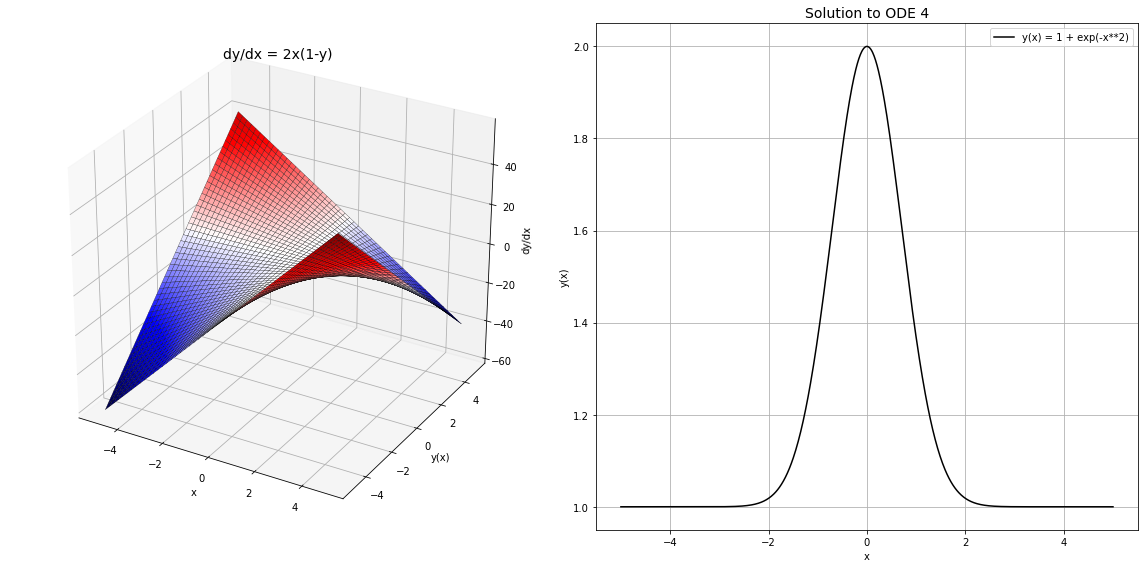

In [4]:
x_3d = np.arange(-5, 5, 0.01)
y_3d = np.arange(-5, 5, 0.01)
X, Y = np.meshgrid(x_3d, y_3d)

dydx = 2 * X * (1-Y)

x = np.linspace(-5, 5, 1000)  
y = 1 + np.exp(-x**2)

fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, dydx, cmap='seismic', edgecolor='k', lw=0.25)
ax1.set_xlabel('x')
ax1.set_ylabel('y(x)')
ax1.set_zlabel('dy/dx')
ax1.set_title('dy/dx = 2x(1-y)', fontsize=14)

ax2 = fig.add_subplot(122)
ax2.plot(x, y, 'k', label='y(x) = 1 + exp(-x**2)')
ax2.set_xlabel('x')
ax2.set_ylabel('y(x)')
ax2.set_title("Solution to ODE 4", fontsize=14)
ax2.legend(loc='best')
ax2.grid(True)

fig.tight_layout()
plt.show()

```{note}

The function `checkodesol` checks that the result from `dsolve` is indeed a solution to the ode. It substitutes in 'solution' into 'ode' and checks that the RHS is zero. If it is, the function returns 'True'.

```

In [5]:
print("Checking solution using checkodesol...") 
check = checkodesol(ode, solution)

print("Output from checkodesol:", check)

if(check[0] == True):
    print("y(x) is indeed a solution to ODE #4") 
else:
    print("y(x) is NOT a solution to ODE #4") 

Checking solution using checkodesol...
Output from checkodesol: (True, 0)
y(x) is indeed a solution to ODE #4


```{note}

The mpmath module can handle initial conditions (x0, y0) when solving an initial value problem, using the 
odefun function. However, this will not give you an analytical solution to the ODE, only a numerical solution.

```

In [6]:
f = mpmath.odefun(lambda x, y: 2*x*(1-y), x0=0, y0=2)

# compares the numerical solution f(x) with the values of the (already known) analytical solution 
# between x=0 and x=10
for x in np.linspace(0, 10, 101):
    print("x=%.1f" % (x), ",", f(x), ",", 1+exp(-x**2))

x=0.0 , 2.0 , 2.0
x=0.1 , 1.99004983374917 , 1.990049833749168
x=0.2 , 1.96078943915232 , 1.960789439152323
x=0.3 , 1.91393118527123 , 1.9139311852712282
x=0.4 , 1.85214378896621 , 1.8521437889662113
x=0.5 , 1.7788007830714 , 1.778800783071405
x=0.6 , 1.69767632607103 , 1.697676326071031
x=0.7 , 1.61262639418442 , 1.612626394184416
x=0.8 , 1.52729242404305 , 1.5272924240430485
x=0.9 , 1.44485806622294 , 1.444858066222941
x=1.0 , 1.36787944117144 , 1.3678794411714423
x=1.1 , 1.29819727942989 , 1.2981972794298873
x=1.2 , 1.23692775868212 , 1.2369277586821217
x=1.3 , 1.18451952399299 , 1.1845195239929893
x=1.4 , 1.14085842092104 , 1.1408584209210448
x=1.5 , 1.10539922456186 , 1.1053992245618642
x=1.6 , 1.0773047404433 , 1.0773047404432998
x=1.7 , 1.05557621261148 , 1.055576212611483
x=1.8 , 1.03916389509899 , 1.039163895098987
x=1.9 , 1.02705184686635 , 1.0270518468663503
x=2.0 , 1.01831563888873 , 1.0183156388887342
x=2.1 , 1.01215517832991 , 1.012155178329915
x=2.2 , 1.00790705405159 , 

# Separation of variables

**Slide 20**

We can solve ODEs via separation of variables in Python using `sympy.dsolve` by passing the `hint` argument. Note that the optional `hint` argument here has been used to tell SymPy how to solve the ODE. However, it is usually smart enough to work it out for itself.

In [7]:
x = Symbol('x')  # Independent variable
y = Function('y')(x)  # Dependent variable y(x)

# The ODE we wish to solve.
ode = (1.0/y)*diff(y,x) - cos(x)
print("ODE #5:") 
pprint(ode)

# Solve the ode for function y(x).using separation of variables.
solution = dsolve(ode, y, hint='separable')
print("The solution to ODE #5 is:") 
pprint(solution)

ODE #5:
              d       
          1.0⋅──(y(x))
              dx      
-cos(x) + ────────────
              y(x)    
The solution to ODE #5 is:
           1.0⋅sin(x)
y(x) = C₁⋅ℯ          


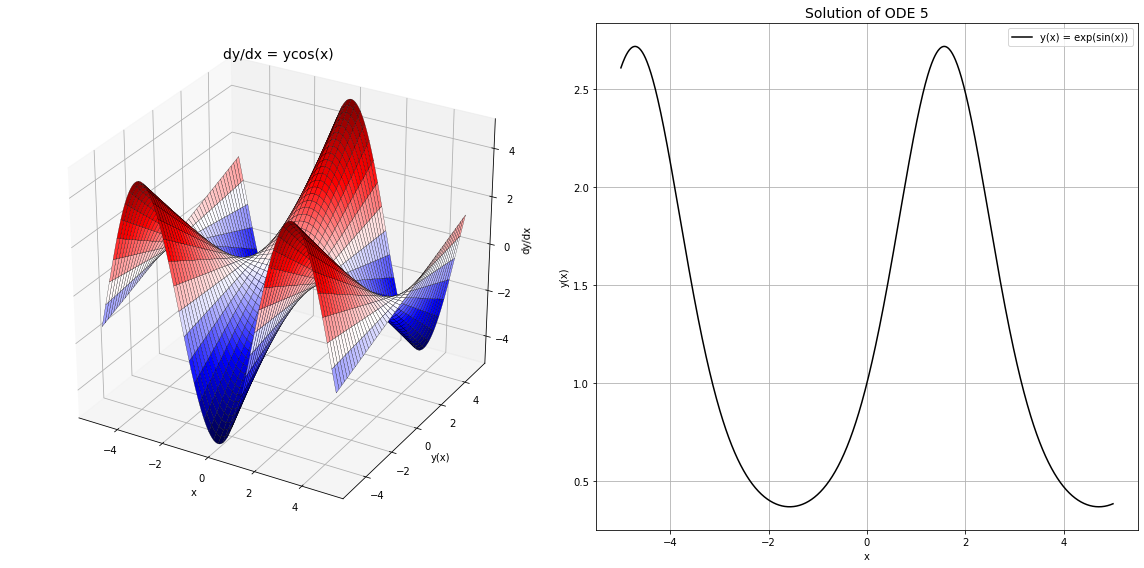

In [8]:
x_3d = np.arange(-5, 5, 0.01)
y_3d = np.arange(-5, 5, 0.01)
X, Y = np.meshgrid(x_3d, y_3d)

dydx = Y * np.cos(X) 

x = np.linspace(-5, 5, 1000)
y = np.exp(np.sin(x))
    
fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, dydx, cmap='seismic', edgecolor='k', lw=0.25)
ax1.set_xlabel('x')
ax1.set_ylabel('y(x)')
ax1.set_zlabel('dy/dx')
ax1.set_title('dy/dx = ycos(x)', fontsize=14)

ax2 = fig.add_subplot(122)
ax2.plot(x, y, 'k', label='y(x) = exp(sin(x))')
ax2.set_xlabel('x')
ax2.set_ylabel('y(x)')
ax2.set_title("Solution of ODE 5", fontsize=14)
ax2.legend(loc='best')
ax2.grid(True)

fig.tight_layout()
plt.show()

# Integration factor

**Slide 23**

In [9]:
x = Symbol('x')  # Independent variable
y = Function('y')(x)  # Dependent variable y(x)
# The ODE we wish to solve.
ode = diff(y,x) - 2*x + 2*x*y

print("ODE #6:") 
pprint(ode)
# Solve the ode for function y(x).using separation of variables
solution = dsolve(ode, y)
print("The solution to ODE #6 is:", solution) 

ODE #6:
                 d       
2⋅x⋅y(x) - 2⋅x + ──(y(x))
                 dx      
The solution to ODE #6 is: Eq(y(x), C1*exp(-x**2) + 1)


## Application

### Radioactive decay

**Slide 26**

In [10]:
t = Symbol('t')  # Independent variable
N = Function('N')(t)  # Dependent variable N(t)
l = Symbol('l')  # Constant
# The ODE we wish to solve:
ode = diff(N,t) + l*N

print("ODE #7:") 
pprint(ode)
solution = dsolve(ode, N)
print("The solution to ODE #7 is:")
pprint(solution) 

ODE #7:
         d       
l⋅N(t) + ──(N(t))
         dt      
The solution to ODE #7 is:
           -l⋅t
N(t) = C₁⋅ℯ    


**Example:** 1 mole of carbon-14 at t=0

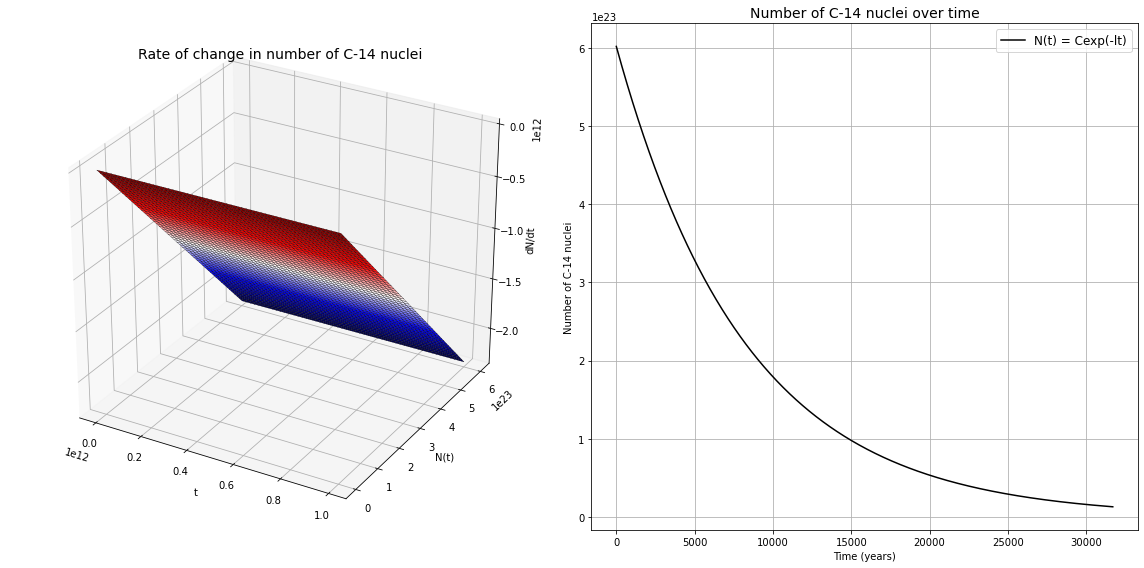

In [11]:
l = 3.8394e-12
C = 6.02e23 * np.exp(l)

t_3d = np.arange(0, 1e12, 1e9)
n_3d = np.arange(0, 6.02e23, 6.02e20)
N, T = np.meshgrid(n_3d, t_3d)

dNdt = -l * N

t = np.linspace(0, 1e12, 1000)
n = C * np.exp(-l*t)
    
t_years = t/(3600*24*365.25)
   
fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(T, N, dNdt, cmap='seismic', edgecolor='k', lw=0.25)
ax1.set_xlabel('t')
ax1.set_ylabel('N(t)')
ax1.set_zlabel('dN/dt')
ax1.set_title('Rate of change in number of C-14 nuclei', fontsize=14)

ax2 = fig.add_subplot(122)
ax2.plot(t_years, n, 'k', label='N(t) = Cexp(-lt)')
ax2.set_xlabel('Time (years)')
ax2.set_ylabel('Number of C-14 nuclei')
ax2.set_title("Number of C-14 nuclei over time", fontsize=14)
ax2.legend(loc='best', fontsize=12)
ax2.grid(True)

fig.tight_layout()
plt.show()

```{note}

The plane in the first graph shows that radioactive decay is independent of time, but only dependent on the number of radioactive nuclei present.

```

### Particle settling

**Slide 31**

In [12]:
t = Symbol('t')  # Independent variable - time
v = Function('v')(t)  # Dependent variable v(t) - the particle velocity
# Physical constants
rho_f = Symbol('rho_f')  # Fluid density
rho_p = Symbol('rho_p')  # Particle density
eta = Symbol('eta')  # Viscosity
g = Symbol('g')  # Gravitational acceleration
a = Symbol('a')  # Particle radius

# The ODE we wish to solve.
ode = diff(v,t) - ((rho_p - rho_f)/rho_p)*g + (9*eta/(2*(a**2)*rho_p))*v

print("ODE #8:") 
pprint(ode)
solution = dsolve(ode, v)
print("The solution to ODE #8 is:")
pprint(solution) 

ODE #8:
  g⋅(-ρ_f + ρₚ)   d          9⋅η⋅v(t)
- ───────────── + ──(v(t)) + ────────
        ρₚ        dt            2    
                             2⋅a ⋅ρₚ 
The solution to ODE #8 is:
                                     ⎛       9⋅t  ⎞
                                   η⋅⎜C₁ - ───────⎟
                                     ⎜        2   ⎟
            2            2           ⎝     2⋅a ⋅ρₚ⎠
       - 2⋅a ⋅g⋅ρ_f + 2⋅a ⋅g⋅ρₚ + ℯ                
v(t) = ────────────────────────────────────────────
                           9⋅η                     


**Example**: sand grain with density 2650kg/m3 and radius 1mm sinking in water.

Initial conditions: v=0 when t=0

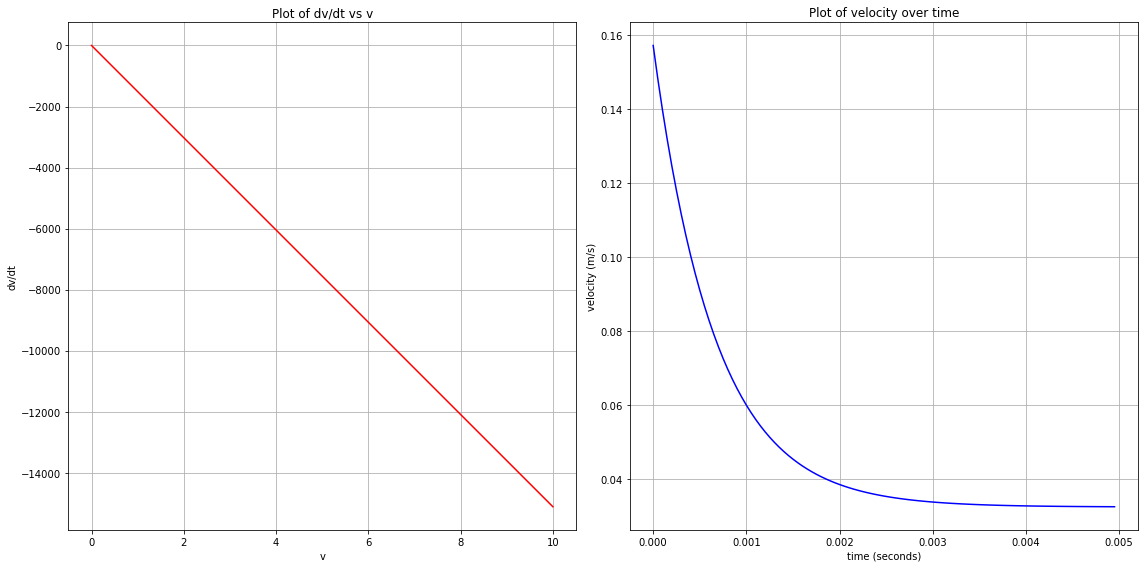

In [13]:
rho_f = 1000
rho_p = 2650
eta = 0.89
g = 9.81
a = 1e-3

C = -(2*a**2*rho_p)/(9*eta) * np.log((rho_p-rho_f)/rho_p)

v_ode = np.linspace(0, 10, 1000)
dvdt = (rho_p-rho_f)/rho_p - (9*eta*v_ode)/(2*a**2*rho_p)

t = np.arange(0, 0.005, 0.00005)
v = -2*a**2*g*rho_f + 2*a**2*g*rho_p + np.exp(eta*(C - 9*t/(2*a**2*rho_p)))/(9*eta)

fig = plt.figure(figsize=(16, 8))

ax1 = fig.add_subplot(121)
ax1.plot(v_ode, dvdt, 'r')
ax1.set_xlabel('v')
ax1.set_ylabel('dv/dt')
ax1.set_title("Plot of dv/dt vs v")
ax1.grid(True)

ax2 = fig.add_subplot(122)
ax2.plot(t, v, 'b')
ax2.set_xlabel('time (seconds)')
ax2.set_ylabel('velocity (m/s)')
ax2.set_title("Plot of velocity over time")
ax2.grid(True)

fig.tight_layout()
plt.show()